In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb
import copy
import time
from astropy import units as u
from astropy.constants import G
from astropy.io import ascii
from matplotlib import gridspec

% matplotlib inline

<img src="files/cassan.png" style="width: 500px;">

## Goal: Get planet occurrence rate data from Cassan et al. 2012: https://arxiv.org/abs/1202.0903

### These are planets with $M_p$ in the range $5 M_{Earth} - 10 M_J$ orbiting in the semi-major axis range $0.5-10AU$ around all types of stars.

### They fit the following power law:
$\frac{d(N_{planet}/N_{star})}{d\log{a}d\log{M}} = 10^{-0.62} \left(\frac{M}{M_{Saturn}}\right)^{-0.73}$

where

$M_{Saturn} = 2.86 * 10^{-4} M_{\odot}$

therefore

$\frac{d(N_{planet}/N_{star})}{d\log{a}d\log{M}} = 10^{-0.62} \left(\frac{M}{2.86 * 10^{-4} M_{\odot}}\right)^{-0.73}$

and substituting around to get $M$ instead of $\log{M}$, we get:

$\frac{d(N_{planet}/N_{star})}{d\log{a}dM} = 10^{-0.62} \left(\frac{M}{2.86 * 10^{-4} M_{\odot}}\right)^{-0.73} \frac{1}{M}$

We can then integrate over the allowable $a$ range to yield:


$\frac{d(N_{planet}/N_{star})}{dM} = 3.0 * 10^{-0.62} \left(\frac{M}{2.86 * 10^{-4} M_{\odot}}\right)^{-0.73} \frac{1}{M}$

And then, to convert to a number density of planets, we can multiply both sides by the number density of stars in the Solar neighborhood, assuming that this number density is representative of the number density of stars in the Galaxy. From Howard et al. 2010, there are 235 G, K, and M-dwarfs within 25 pc of the Sun, so:

$\frac{dN}{dMdV} = 3.67 * 10^{-3} * 3.0 * 10^{-0.62} \left(\frac{M}{2.86 * 10^{-4} M_{\odot}}\right)^{-0.73} \frac{1}{M}$

## power law

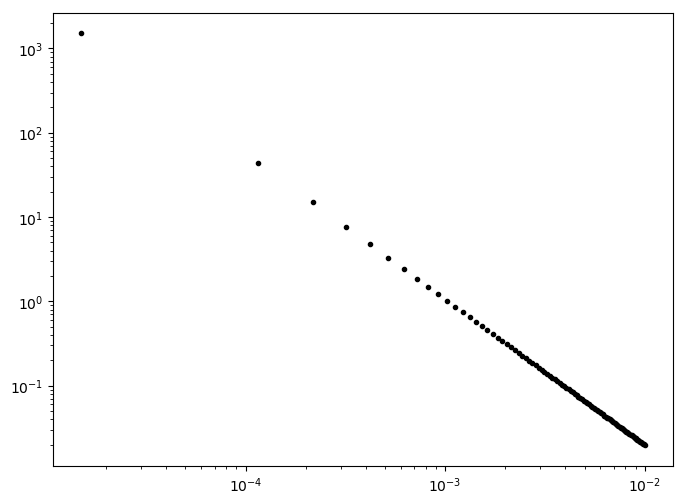

In [3]:
mbins = np.linspace(5.*3.e-6, 10.e-3, 100) #5Mearth to 10Mjup in units of solar masses

dnbins = 3.67e-3 * 3. * 10.**(-0.62) * (mbins/(2.86e-4))**(-0.73) * (1./mbins)
dnbins_univ = 5.e-10 * 3. * 10.**(-0.62) * (mbins/(2.86e-4))**(-0.73) * (1./mbins)

fig = plt.figure(figsize=(8,6))
plt.plot(mbins, dnbins, 'k.')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [4]:
microlensing =np.vstack((mbins,dnbins)).T
np.savetxt('../data/planetsMicrolensing.txt',microlensing,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)')

In [5]:
microlensing_univ =np.vstack((mbins,dnbins_univ)).T
np.savetxt('../data/planetsMicrolensing_univ.txt',microlensing_univ,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)')